<a href="https://colab.research.google.com/github/whoissourabh/Next-Word-Prediction-Model/blob/main/Next_Word_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Required Libraries:

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

### Load and Pre Processing the data

In [4]:
file = open("/content/drive/MyDrive/B.tech/Semester 7/Project/Next Word Prediction Model/Metamorphosis by Franz Kafka.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Metamorphosis, by Franz Kafka This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBo'

In [5]:
len(data)

137893

### Applying Tokenization

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]


[1, 44, 38, 253, 5, 582, 46, 842, 843, 27, 253, 77, 18, 1, 144]

In [7]:
len(sequence_data)


25298

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)


3127


In [9]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]


The Length of sequences are:  25295


array([[  1,  44,  38, 253],
       [ 44,  38, 253,   5],
       [ 38, 253,   5, 582],
       [253,   5, 582,  46],
       [  5, 582,  46, 842],
       [582,  46, 842, 843],
       [ 46, 842, 843,  27],
       [842, 843,  27, 253],
       [843,  27, 253,  77],
       [ 27, 253,  77,  18]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)


In [11]:
print("Data: ", X[:10])
print("Response: ", y[:10])


Data:  [[  1  44  38]
 [ 44  38 253]
 [ 38 253   5]
 [253   5 582]
 [  5 582  46]
 [582  46 842]
 [ 46 842 843]
 [842 843  27]
 [843  27 253]
 [ 27 253  77]]
Response:  [253   5 582  46 842 843  27 253  77  18]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             31270     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 3127)              3130127   
                                                                 
Total params: 16210397 (61.84 MB)
Trainable params: 16210397 (61.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
396/396 [==============================] - ETA: 0s - loss: 6.4499
Epoch 1: loss improved from inf to 6.44987, saving model to next_words.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


396/396 [==============================] - 22s 31ms/step - loss: 6.4499
Epoch 2/70
393/396 [============================>.] - ETA: 0s - loss: 6.0112
Epoch 2: loss improved from 6.44987 to 6.01033, saving model to next_words.h5
396/396 [==============================] - 7s 17ms/step - loss: 6.0103
Epoch 3/70
396/396 [==============================] - ETA: 0s - loss: 5.6358
Epoch 3: loss improved from 6.01033 to 5.63576, saving model to next_words.h5
396/396 [==============================] - 8s 19ms/step - loss: 5.6358
Epoch 4/70
393/396 [============================>.] - ETA: 0s - loss: 5.2709
Epoch 4: loss improved from 5.63576 to 5.27299, saving model to next_words.h5
396/396 [==============================] - 6s 16ms/step - loss: 5.2730
Epoch 5/70
396/396 [==============================] - ETA: 0s - loss: 4.9708
Epoch 5: loss improved from 5.27299 to 4.97082, saving model to next_words.h5
396/396 [==============================] - 7s 18ms/step - loss: 4.9708
Epoch 6/70
396/396 [====

In [16]:
history = model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
395/396 [============================>.] - ETA: 0s - loss: 0.2742
Epoch 1: loss did not improve from 0.26208
396/396 [==============================] - 6s 16ms/step - loss: 0.2741
Epoch 2/70
393/396 [============================>.] - ETA: 0s - loss: 0.2651
Epoch 2: loss did not improve from 0.26208
396/396 [==============================] - 6s 15ms/step - loss: 0.2653
Epoch 3/70
395/396 [============================>.] - ETA: 0s - loss: 0.2524
Epoch 3: loss improved from 0.26208 to 0.25247, saving model to next_words.h5
396/396 [==============================] - 7s 17ms/step - loss: 0.2525
Epoch 4/70
394/396 [============================>.] - ETA: 0s - loss: 0.2492
Epoch 4: loss improved from 0.25247 to 0.24948, saving model to next_words.h5
396/396 [==============================] - 7s 17ms/step - loss: 0.2495
Epoch 5/70
394/396 [============================>.] - ETA: 0s - loss: 0.2488
Epoch 5: loss improved from 0.24948 to 0.24924, saving model to next_words.h5
396/396 [==

### DATA VISUALIZATION

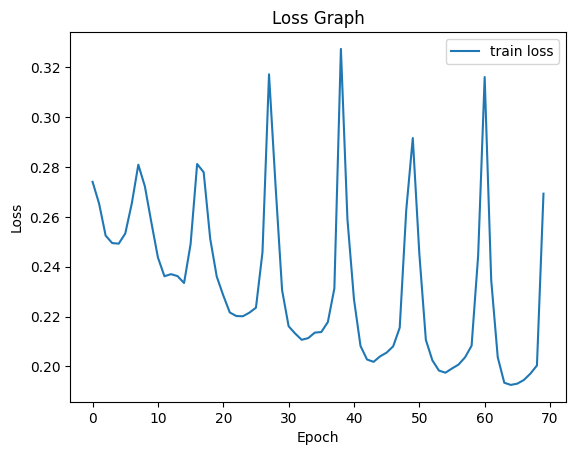

In [17]:
# Loss graph
plt.plot(history.history['loss'], label='train loss')
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

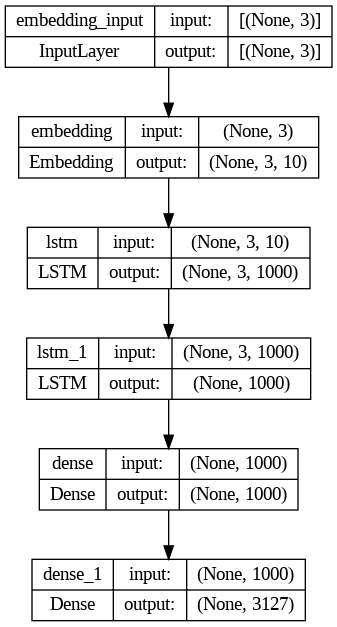

In [18]:
# Assuming 'model' is your Keras model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Prediction

In [19]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word


In [ ]:
while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue